<a href="https://colab.research.google.com/github/Alicia-MJ/Experimento_de-ansiedad_pesimismo/blob/main/C%C3%B3digo_del_experimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

26 de Diciembre de 2022










**Universidad Nacional Autónoma de México**

Facultad de Psicología





**Alicia Muñiz Jiménez**

##**El estudio computacional de la ansiedad con un algoritmo de Inteligencia Artificial**

##Código del experimento

In [ ]:
#@title Actualización de python para poder usar la paquetería NeuroNav

#install python 3.9
!sudo apt-get update -y
!sudo apt-get install python3.9

#change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2

#check python version
!python --version
#3.9.6

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [2,235 kB]
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:13 https://developer.download.nvidia.co

In [ ]:
#@title Instalación de la paquetería neuro-nav
!pip install "git+https://github.com/awjuliani/neuro-nav.git"


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/awjuliani/neuro-nav.git to /tmp/pip-req-build-ehqhbgg5
  Running command git clone -q https://github.com/awjuliani/neuro-nav.git /tmp/pip-req-build-ehqhbgg5
  Created wheel for neuronav: filename=neuronav-0.8.0-py3-none-any.whl size=23723 sha256=b05d1f45194c29e0c15a8fcf70b7366bf3caa654178bc0273e6129e3b17009fd
  Stored in directory: /tmp/pip-ephem-wheel-cache-kydq5udn/wheels/02/a6/27/12c26dfee33aac9ca7219585ad6521911367a0e3f11278c3e2
Successfully built neuronav


In [ ]:
#@title Importación de librerías
from neuronav.envs.grid_env import GridEnv, GridSize, GridObsType, OrientationType
from neuronav.envs.graph_env import GraphEnv
from neuronav.agents.td_agents import TDSR, TDQ
from neuronav.agents.mb_agents import MBV
from neuronav.envs.grid_topographies import GridTopography
from neuronav.envs.graph_structures import GraphStructure
from neuronav.utils import run_episode, plot_values_and_policy
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'retina'

## Fase 1 del experimento

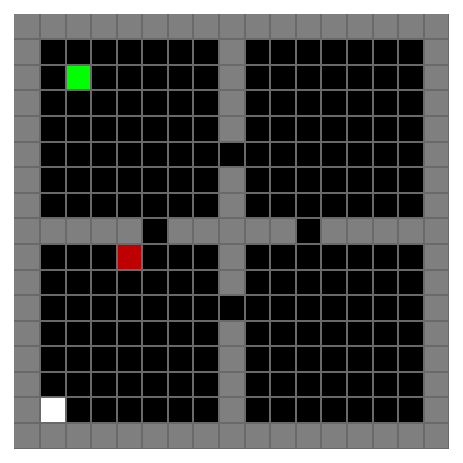

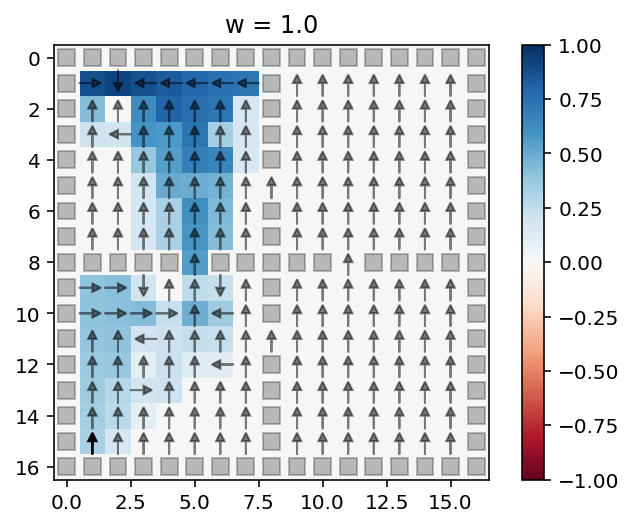

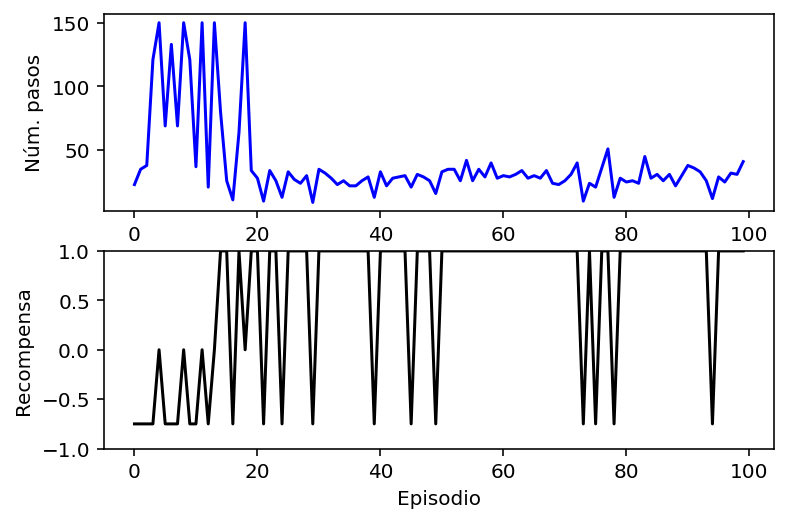

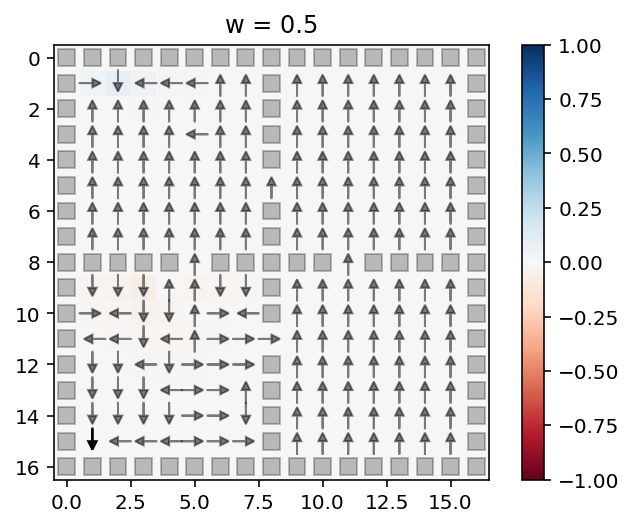

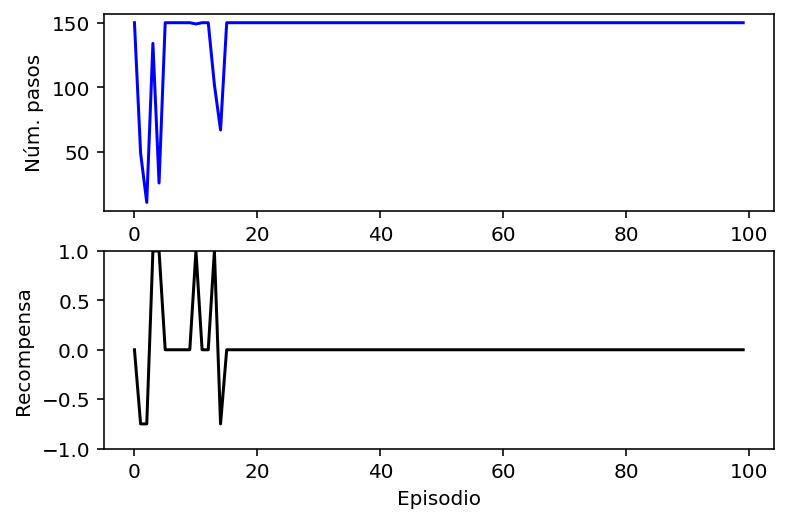

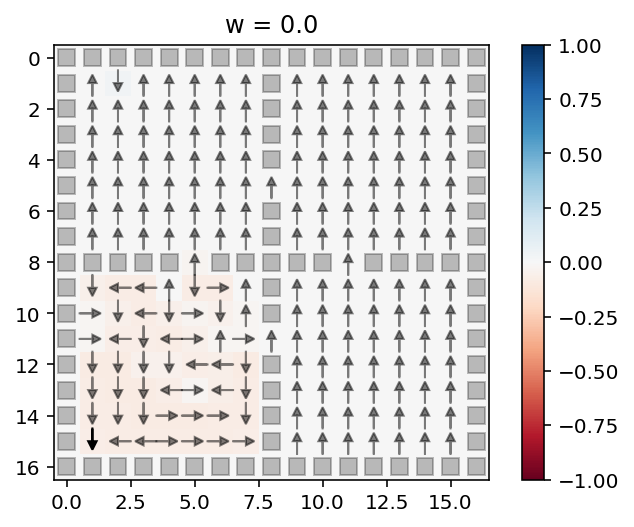

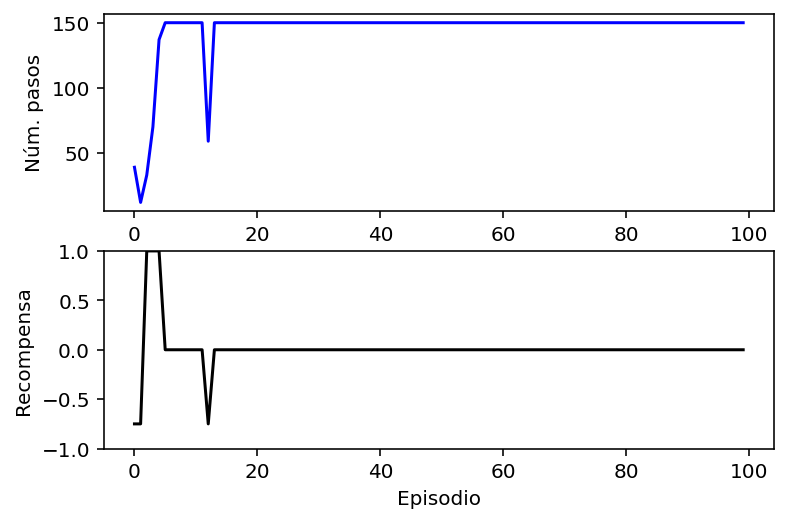

In [ ]:
#@title Agente en entorno grande
num_episodes = 100
num_steps = 150
w_values = [1.0, 0.5, 0.0]

env = GridEnv(
    topography=GridTopography.four_rooms,
    grid_size=GridSize.large
)

reward_map = {(2, 2): 1.0, (9, 4): -0.75}
start_pos = (15, 1)

obs = env.reset(reward_locs=reward_map, agent_pos=start_pos)
#add_block = [[11, 8]]
#env.blocks.extend(add_block)
env.render()


for w_value in w_values:
    agent = MBV(
        env.state_size,
        env.action_space.n,
        lr=5e-2,
        poltype="egreedy",
        epsilon=0.25,
        gamma=0.95,
        w_value=w_value,
    )
    
    total_steps = []
    tot_returns = []
    for i in range(num_episodes):
        agent, steps, ep_return = run_episode(
            env, agent, max_steps=num_steps, reward_locs=reward_map, start_pos=start_pos
        )
        tot_returns.append(ep_return)
        total_steps.append(steps)


    plot_values_and_policy(agent, env, start_pos, f"w = {w_value}")

    fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 4))
    ax1.plot(total_steps, color="blue")
    ax1.set_ylabel('Núm. pasos')
    ax1.set_xlabel('Episodio')

    ax2.plot(tot_returns, color="black")
    ax2.set_ylabel('Recompensa')
    ax2.set_xlabel('Episodio')
    ax2.set_ylim(-1,1)




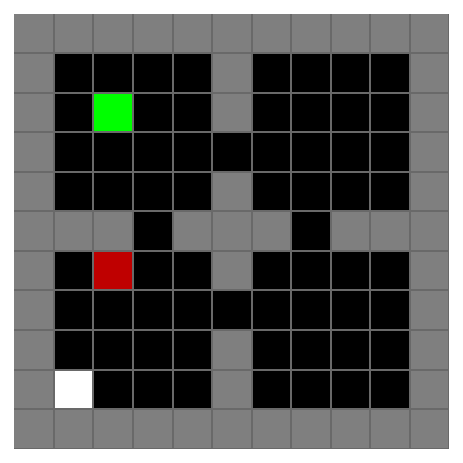

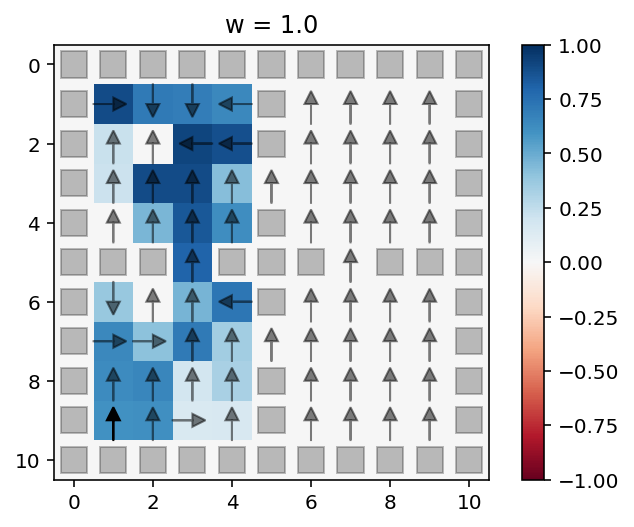

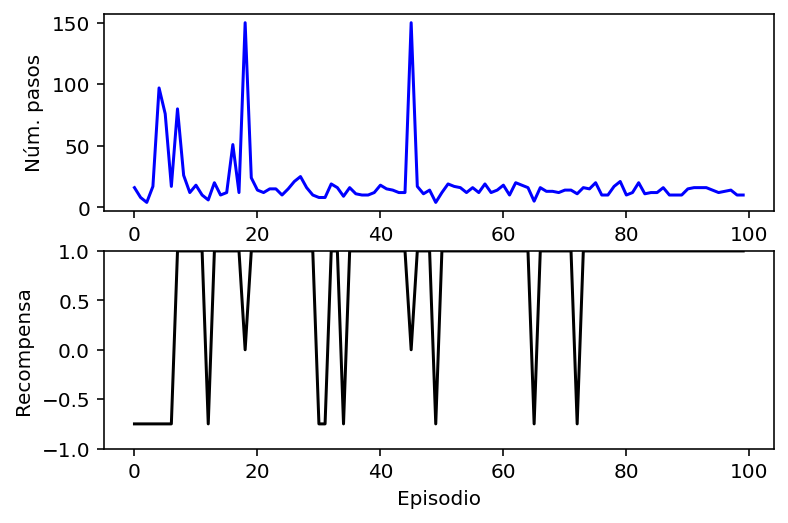

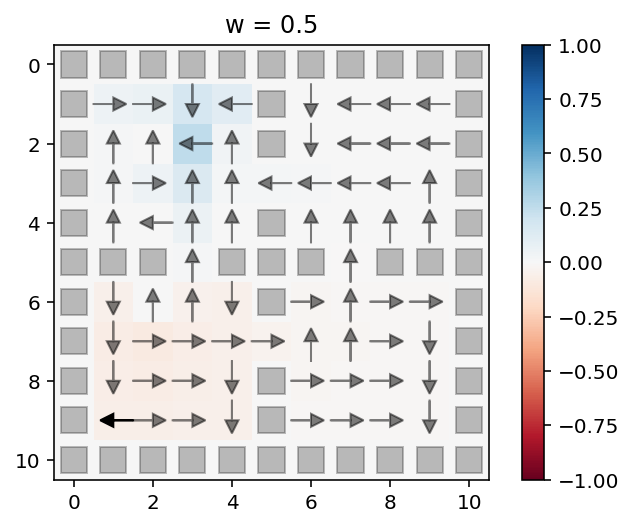

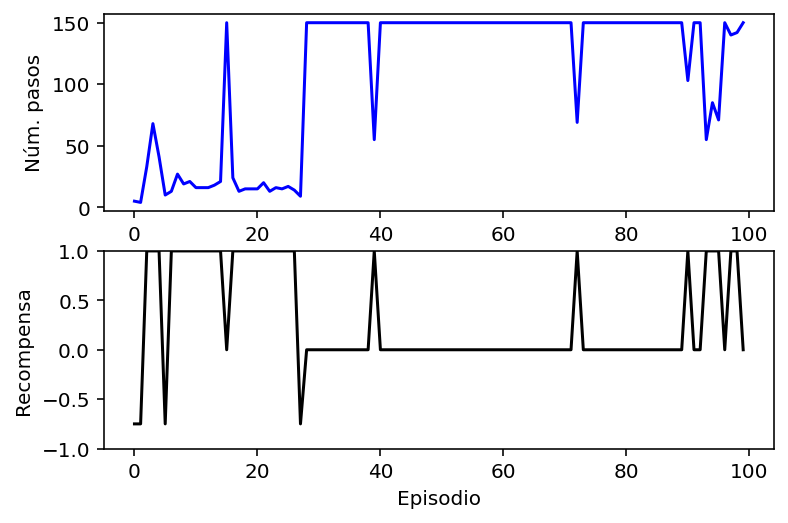

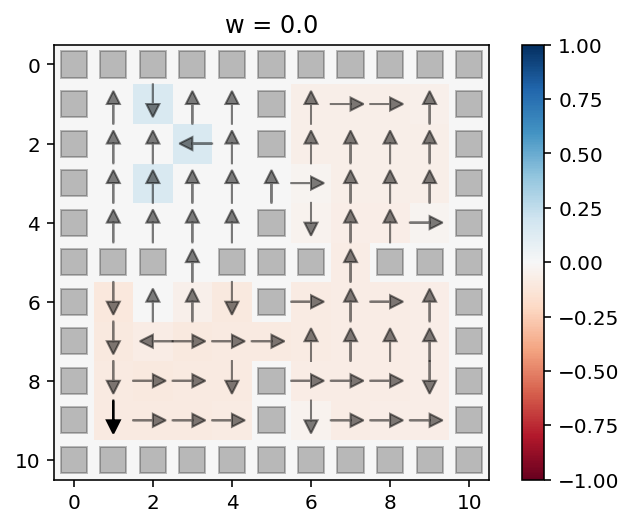

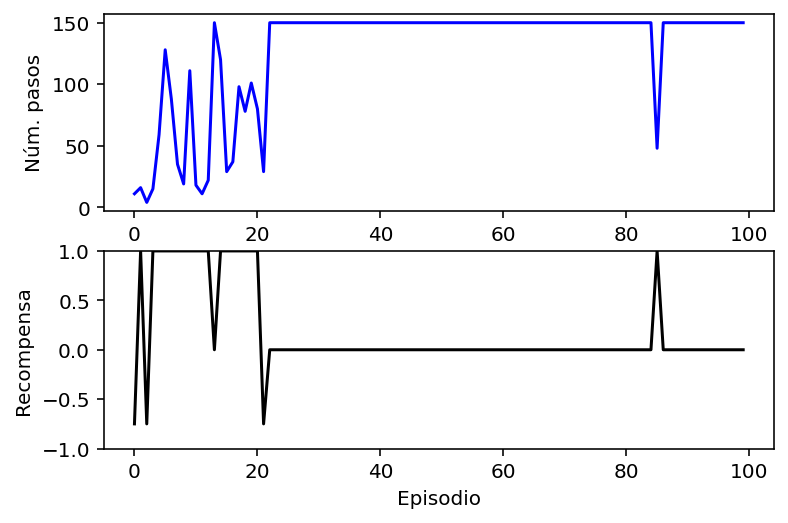

In [ ]:
#@title Agente en entorno pequeño
num_episodes = 100
num_steps = 150
w_values = [1.0, 0.5, 0.0]

env = GridEnv(
    topography=GridTopography.four_rooms,
    grid_size=GridSize.small
)

reward_map = {(2, 2): 1.0, (6, 2): -0.75}
start_pos = (9, 1)

obs = env.reset(reward_locs=reward_map, agent_pos=start_pos)

env.render()


for w_value in w_values:
    agent = MBV(
        env.state_size,
        env.action_space.n,
        lr=5e-2,
        poltype="egreedy",
        epsilon=0.25,
        gamma=0.95,
        w_value=w_value,
    )
    
    total_steps = []
    tot_returns = []
    for i in range(num_episodes):
        agent, steps, ep_return = run_episode(
            env, agent, max_steps=num_steps, reward_locs=reward_map, start_pos=start_pos
        )
        tot_returns.append(ep_return)
        total_steps.append(steps)


    plot_values_and_policy(agent, env, start_pos, f"w = {w_value}")

    fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 4))
    ax1.plot(total_steps, color="blue")
    ax1.set_ylabel('Núm. pasos')
    ax1.set_xlabel('Episodio')

    ax2.plot(tot_returns, color="black")
    ax2.set_ylabel('Recompensa')
    ax2.set_xlabel('Episodio')
    ax2.set_ylim(-1,1)


## Fase dos del experimento

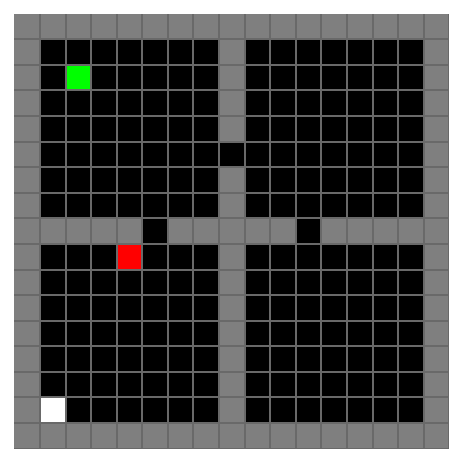

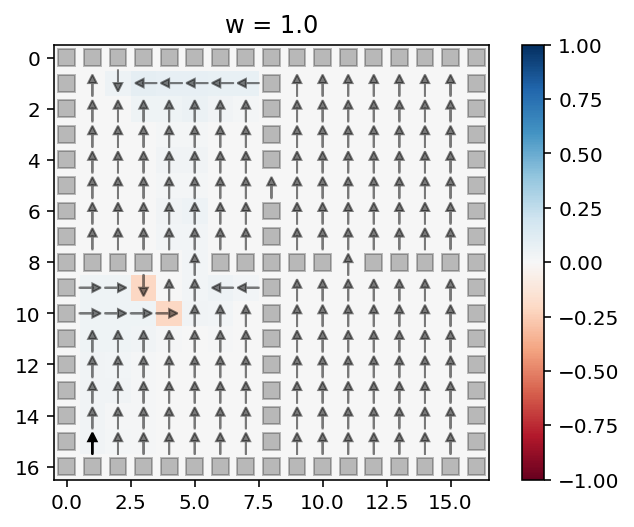

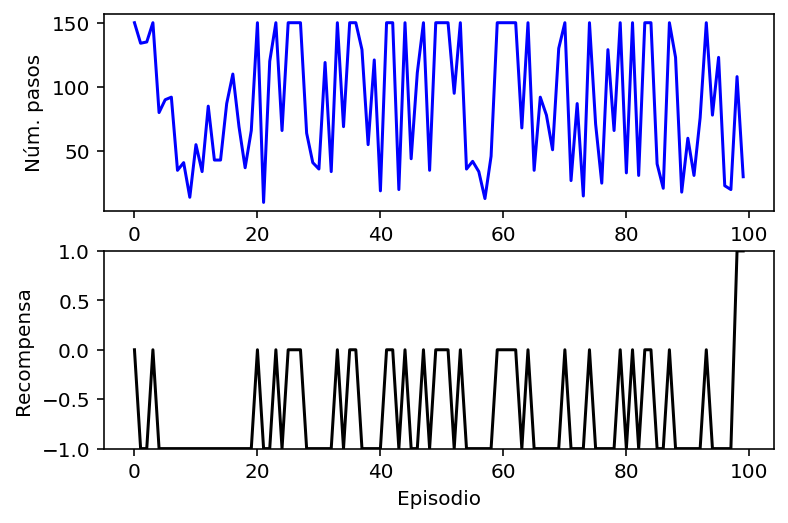

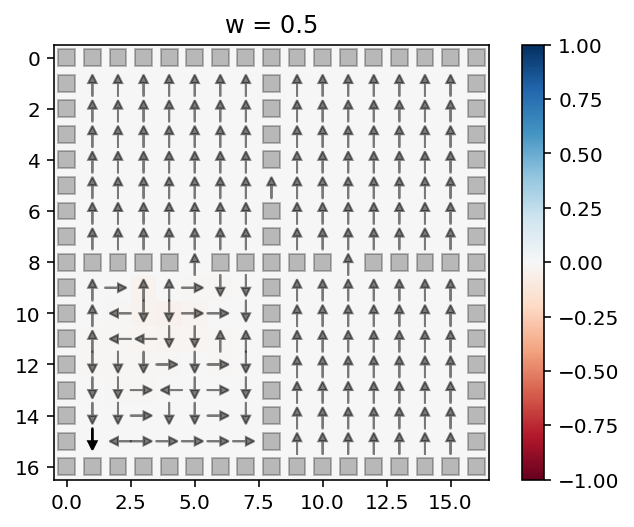

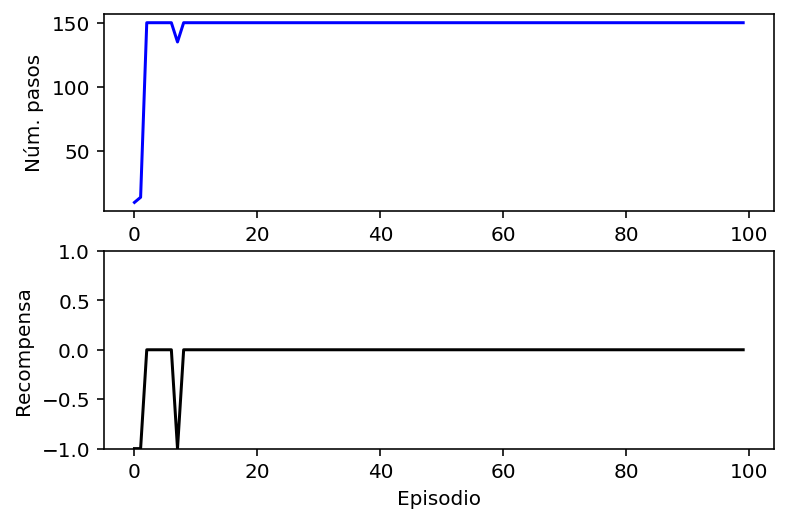

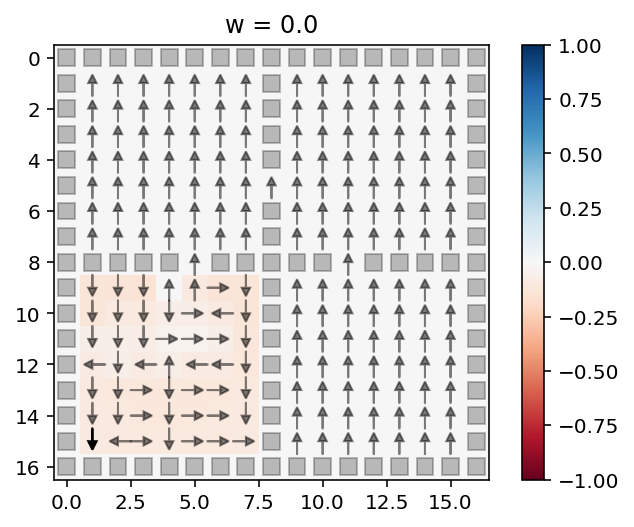

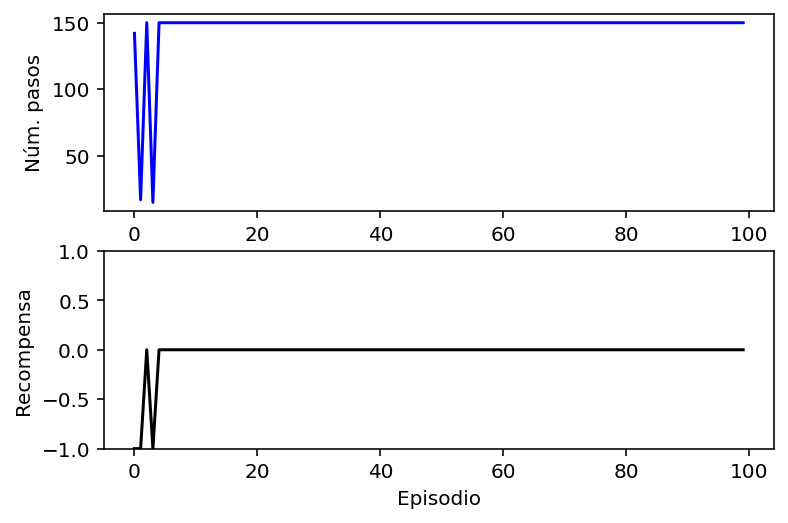

In [ ]:
#@title Agente en entorno grande
num_episodes = 100
num_steps = 150
w_values = [1.0, 0.5, 0.0]

env = GridEnv(
    topography=GridTopography.four_rooms,
    grid_size=GridSize.large
)

reward_map = {(2, 2): 1.0, (9, 4): -1.0}
start_pos = (15, 1)

obs = env.reset(reward_locs=reward_map, agent_pos=start_pos)
add_block = [[11, 8]]
env.blocks.extend(add_block)
env.render()


for w_value in w_values:
    agent = MBV(
        env.state_size,
        env.action_space.n,
        lr=5e-2,
        poltype="egreedy",
        epsilon=0.25,
        gamma=0.95,
        w_value=w_value,
    )
    
    total_steps = []
    tot_returns = []
    for i in range(num_episodes):
        agent, steps, ep_return = run_episode(
            env, agent, max_steps=num_steps, reward_locs=reward_map, start_pos=start_pos
        )
        tot_returns.append(ep_return)
        total_steps.append(steps)


    plot_values_and_policy(agent, env, start_pos, f"w = {w_value}")

    fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 4))
    ax1.plot(total_steps, color="blue")
    ax1.set_ylabel('Núm. pasos')
    ax1.set_xlabel('Episodio')

    ax2.plot(tot_returns, color="black")
    ax2.set_ylabel('Recompensa')
    ax2.set_xlabel('Episodio')
    ax2.set_ylim(-1,1)




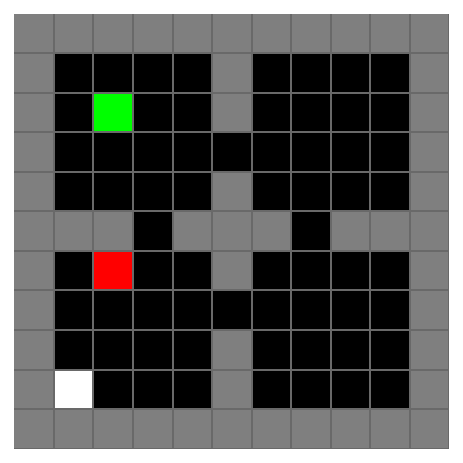

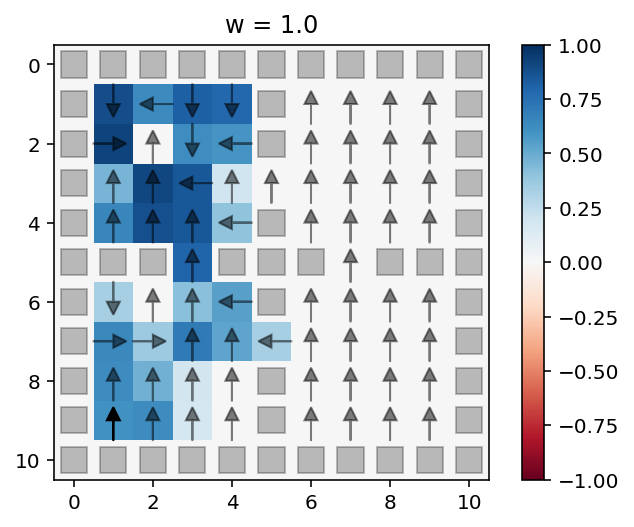

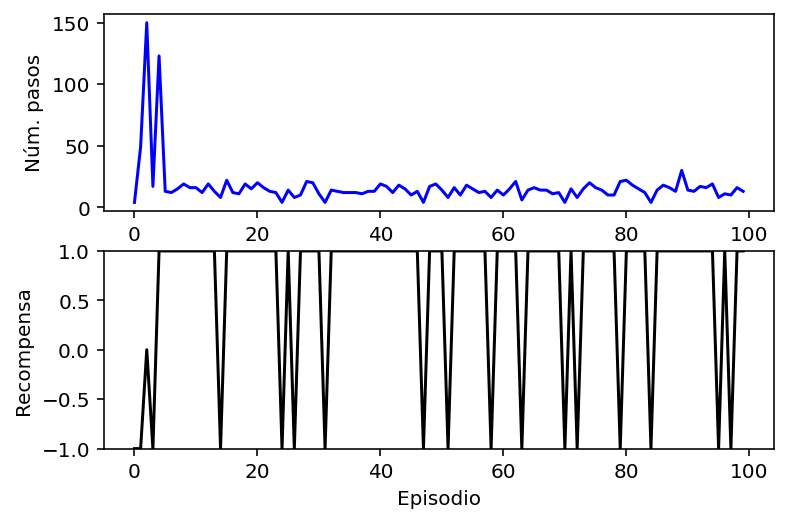

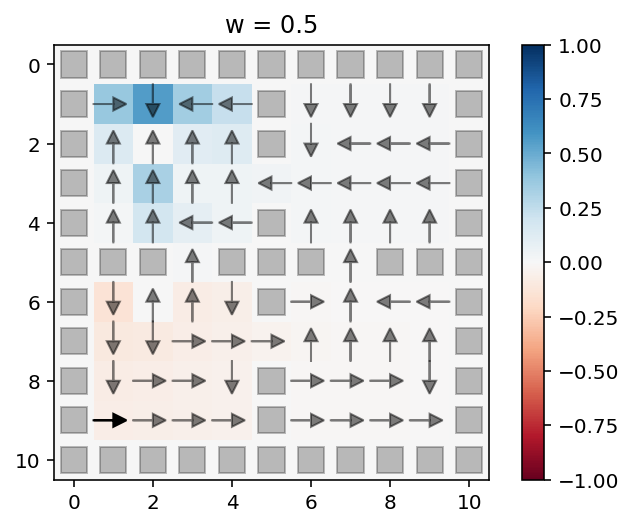

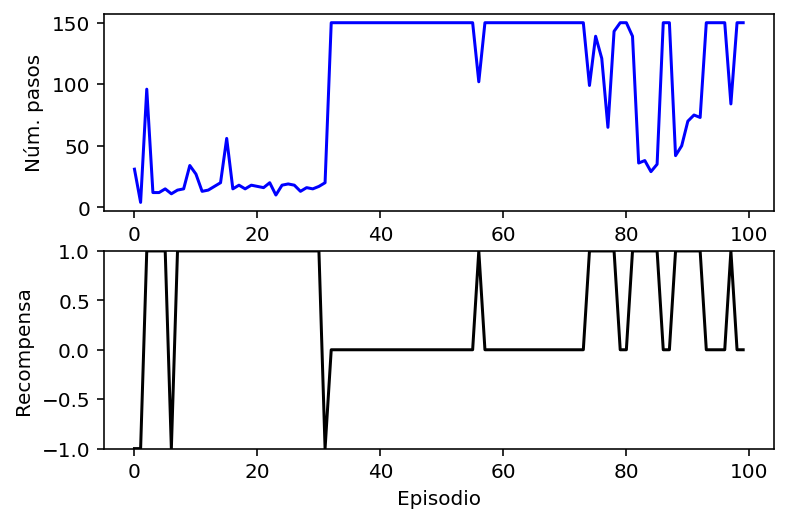

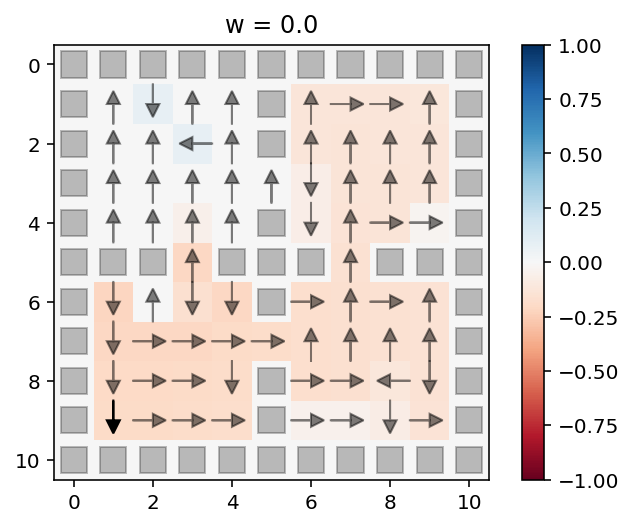

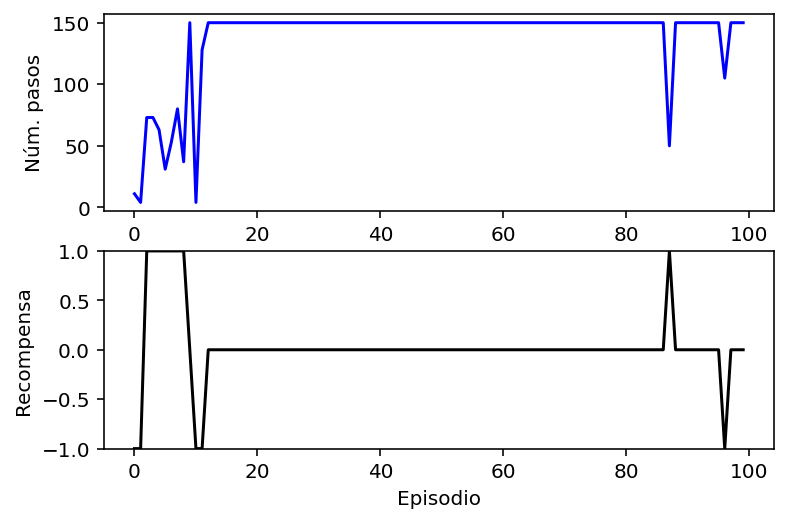

In [ ]:
#@title Agente en entorno pequeño
num_episodes = 100
num_steps = 150
w_values = [1.0, 0.5, 0.0]

env = GridEnv(
    topography=GridTopography.four_rooms,
    grid_size=GridSize.small
)

reward_map = {(2, 2): 1.0, (6, 2): -1.0}
start_pos = (9, 1)

obs = env.reset(reward_locs=reward_map, agent_pos=start_pos)

env.render()


for w_value in w_values:
    agent = MBV(
        env.state_size,
        env.action_space.n,
        lr=5e-2,
        poltype="egreedy",
        epsilon=0.25,
        gamma=0.95,
        w_value=w_value,
    )
    
    total_steps = []
    tot_returns = []
    for i in range(num_episodes):
        agent, steps, ep_return = run_episode(
            env, agent, max_steps=num_steps, reward_locs=reward_map, start_pos=start_pos
        )
        tot_returns.append(ep_return)
        total_steps.append(steps)


    plot_values_and_policy(agent, env, start_pos, f"w = {w_value}")

    fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 4))
    ax1.plot(total_steps, color="blue")
    ax1.set_ylabel('Núm. pasos')
    ax1.set_xlabel('Episodio')

    ax2.plot(tot_returns, color="black")
    ax2.set_ylabel('Recompensa')
    ax2.set_xlabel('Episodio')
    ax2.set_ylim(-1,1)
